# Chapter 3 - Intensity Transformations and Spatial Filtering

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)

NumPy version: 1.26.4
Matplotlib version: 3.8.0
OpenCV version: 4.9.0


In [12]:
img_gray = cv2.imread('../database/chapter_3/lenna.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


## 3.2 - Intensity Transformation Functions

### 3.2.1 - Functions imadjust and stretchlim 

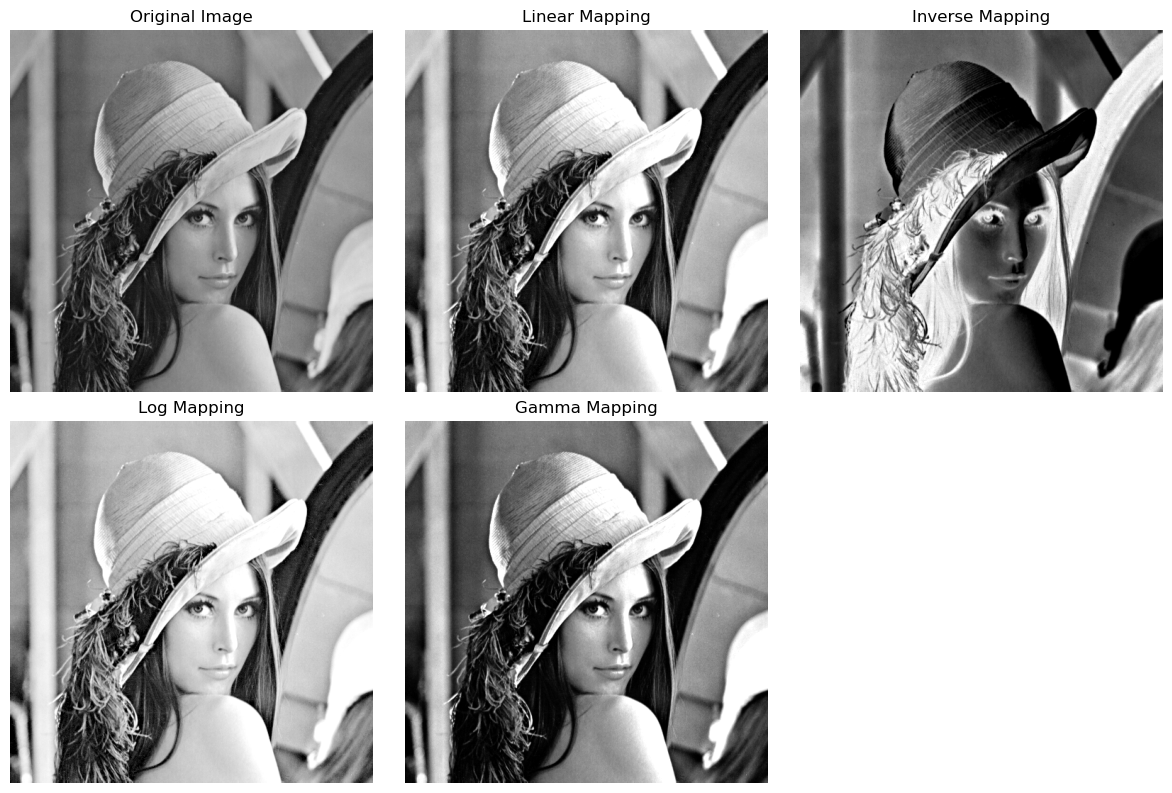

In [17]:
# imadjust function with various mappings
def imadjust(image, low_in, high_in, low_out, high_out, mapping='linear'):
    image = np.clip(image, low_in, high_in)
    
    if mapping == 'linear':
        image = (image - low_in) / (high_in - low_in)
        image = image * (high_out - low_out) + low_out
    elif mapping == 'inverse':
        image = (high_out - low_out) - ((image - low_in) / (high_in - low_in)) * (high_out - low_out) + low_out
    elif mapping == 'log':
        image = (high_out - low_out) * (np.log(image + 1) - np.log(low_in + 1)) / (np.log(high_in + 1) - np.log(low_in + 1)) + low_out
    elif mapping == 'gamma':
        gamma = 1.5
        image = (image - low_in) / (high_in - low_in)
        image = ((image ** gamma) * (high_out - low_out) + low_out).astype(np.uint8)
    else:
        raise ValueError("Invalid mapping. Available options: 'linear', 'inverse', 'log', 'gamma'")
    
    image = np.clip(image, low_out, high_out)
    return image

# Define the input/output range for intensity adjustment
low_in, high_in = 50, 200
low_out, high_out = 0, 255

# Apply different mappings
linear_image = imadjust(img_gray, low_in, high_in, low_out, high_out, mapping='linear')
inverse_image = imadjust(img_gray, low_in, high_in, low_out, high_out, mapping='inverse')
log_image = imadjust(img_gray, low_in, high_in, low_out, high_out, mapping='log')
gamma_image = imadjust(img_gray, low_in, high_in, low_out, high_out, mapping='gamma')

# Plot the original and adjusted images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(linear_image, cmap='gray')
plt.title('Linear Mapping')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(inverse_image, cmap='gray')
plt.title('Inverse Mapping')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(log_image, cmap='gray')
plt.title('Log Mapping')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gamma_image, cmap='gray')
plt.title('Gamma Mapping')
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
# stretchlim
def stretchlim(image, percent_low=1, percent_high=99):
    low_limit = np.percentile(image, percent_low)
    high_limit = np.percentile(image, percent_high)
    return low_limit, high_limit